In [1]:
import json, glob, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from operator import itemgetter
from IPython.display import display, Markdown

In [2]:
def display_experiment(experiment):
    display(Markdown(f'## {experiment["concept"]["label"]} ({experiment["concept"]["id"]})'))
    display(Markdown(experiment["concept"]["definition"]))
    display(Markdown("### Confusion matrix"))
    cm = pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"])
    df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    ax.set_title(experiment["concept"]["label"])
    ax.set(xlabel='LLM', ylabel='KG')
    plt.show()
    df = pd.DataFrame.from_records(experiment["data"])
    df_fp = df[((df["actual"] == 'negative') & (df["predicted"] == 'positive'))][["label", "description", "rationale"]]
    if len(df_fp) > 0:
        df_fp_styler = df_fp.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### LLM positive, KG negative"))
        display(df_fp_styler)
    df_fn = df[((df["actual"] == 'positive') & (df["predicted"] == 'negative'))][["label", "description", "rationale"]]
    if len(df_fn) > 0:
        df_fn_styler = df_fn.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### LLM negative, KG positive"))
        display(df_fn_styler)

In [3]:
experiments = [ experiment for experiment in json.load(open('../experiments/woman_gpt-4_description_results.json', 'r')) if "confusion_matrix" in experiment ]

In [4]:
experiment_df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['id'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": f'{pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC:.1%}',
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    }
    for experiment in experiments ]).sort_values("kappa", ascending=False)
experiment_df[["name", "kappa", "SOA9", "ACC", "FP", "FN", "POP"]]

,name,kappa,SOA9,ACC,FP,FN,POP
1,homosaurus_woman,0.84,High,92.0%,6,2,100
0,oed_woman,0.82,High,91.0%,7,2,100
2,haslanger_woman,0.80,High,90.0%,7,3,100


In [5]:
experiment_df.describe()

,kappa,FP,FN,POP
count,3.00,3.000000,3.000000,3.0
mean,0.82,6.666667,2.333333,100.0
std,0.02,0.577350,0.577350,0.0
min,0.80,6.000000,2.000000,100.0
25%,0.81,6.500000,2.000000,100.0
50%,0.82,7.000000,2.000000,100.0
75%,0.83,7.000000,2.500000,100.0
max,0.84,7.000000,3.000000,100.0


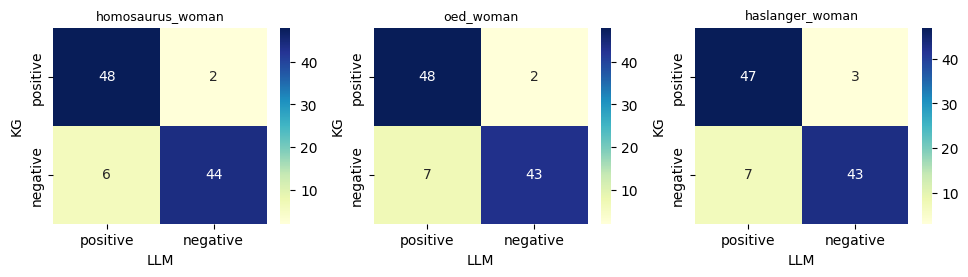

In [6]:
fig = plt.figure(figsize=(20,14))
gs = fig.add_gridspec(4, 5, hspace=0.5)
axes = gs.subplots()
cms = [ (experiment["name"], pycm.ConfusionMatrix(matrix=experiment["experiment"]["confusion_matrix"])) for experiment in experiment_df.to_dict('records')  ]
for ax, (name, cm) in zip(axes.flat, cms):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name, wrap=True, fontsize=9)
    ax.set(xlabel='LLM', ylabel='KG')
for ax in axes.flat[len(cms):]:
    ax.set_visible(False)
plt.show()

## woman (homosaurus_woman)

Adults who self-identify as women and understand their gender in terms of Western conceptions of womanness, femaleness, and/or femininity. The term has typically been defined as adult female humans, though not all women identify with the term 'female' depending on the context in which it is used.

### Confusion matrix

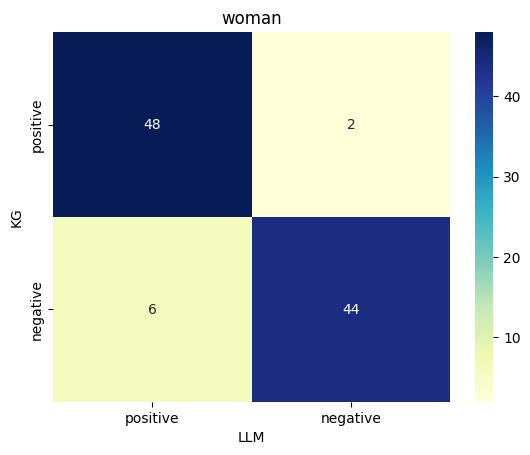

### LLM positive, KG negative

label,description,rationale
Ali Forney,"Ali He'shun Forney (April 12, 1975 – December 5, 1997) was an African-American gay and gender non-conforming transgender youth who also used the name Luscious.Forney was a peer counselor of and advocate for homeless lesbian, gay, bisexual, and transgender (LGBT) youth and was killed on the street in the Harlem neighborhood of Manhattan in New York City. The Ali Forney Center for homeless LGBT youth was named after Forney when it opened in New York City in June 2002.","Based on the provided definition of a woman, Ali Forney could be considered a woman. The definition states that a woman is an adult who self-identifies as a woman and understands their gender in terms of Western conceptions of womanness, femaleness, and/or femininity. It is mentioned that Ali Forney was a gender non-conforming transgender youth, which could imply that they identified with the term 'woman' or 'femaleness'. Furthermore, they used the name Luscious, which is typically associated with femininity. Therefore, based on this information, one could argue that Ali Forney fits the provided definition of a woman."
Bree Lowdermilk,Bree Lowdermilk (formerly Brian Lowdermilk) is an American musical theater composer and lyricist.,"The description of Bree Lowdermilk indicates that she was formerly known as Brian Lowdermilk, suggesting a change in gender identity. This aligns with the definition of a woman as someone who self-identifies as such. Therefore, based on this information, it can be argued that Bree Lowdermilk is a woman."
Rain Dove,"Rain Dove Dubilewski (born September 27, 1989) is an American model, actor, and activist, best known for their work in fashion as a gender-nonconforming model, posing alternately as male and female in photoshoots, productions, and runway shows. Dove was voted as SheWired's Most Eligible Bachelorette in 2014 and named one of Elle Magazine's 12 Women Who Are Redefining Beauty in 2015.A self-described ""gender capitalist"", Dove has written, ""I've never really cared about pronouns for my own descriptors"", and that they disavow personal pronouns and ask people to choose whichever they feel apply: ""Use she, he, it, one, they ... I honestly don't care ... All I'm listening for in that sound is positivity.""","The definition of a woman includes adults who self-identify as women and understand their gender in terms of Western conceptions of womanness, femaleness, and/or femininity. Rain Dove, as described, is a self-described ""gender capitalist"" who does not care about pronouns for their own descriptors and allows people to choose whichever they feel apply, including ""she"". This suggests that Rain Dove may self-identify as a woman in certain contexts, fitting within the provided definition of a woman."
Sidney Flanigan,"Sidney Jeanne Flanigan (born October 19, 1998) is an American actress and singer-songwriter. Flanigan made her acting debut with the acclaimed independent drama film Never Rarely Sometimes Always (2020), for which she received nominations for the Critics' Choice Movie Award for Best Actress and the Independent Spirit Award for Best Female Lead.","The description of Sidney Flanigan indicates that she is an adult, as she was born in 1998, making her over 18 years old. The description also uses female pronouns (""she"", ""her"") to refer to Flanigan, suggesting that she identifies as a woman. Furthermore, she was nominated for the Independent Spirit Award for Best Female Lead, which implies that she is recognized as a female in her professional context. Therefore, based on the provided definition of a woman, Sidney Flanigan can be considered a woman."
Janae Kroc,"Janae Marie Kroczaleski (born Matthew Raymond Kroczaleski) is an American who previously competed as a professional powerlifter and competitive bodybuilder. In regard to combined (squat, bench press, and deadlift) equipped powerlifting total, on April 25, 2009, in Iowa, Kroc set the male world record in the 220 lb. 

### LLM negative, KG positive

label,description,rationale
Elke Mackenzie,"Elke Mackenzie (11 September 1911 – 18 January 1990), born Ivan Mackenzie Lamb, was a British polar explorer and botanist who specialised in the field of lichenology.","The description of Elke Mackenzie does not provide any information about her self-identifying as a woman or understanding her gender in terms of Western conceptions of womanness, femaleness, and/or femininity. Therefore, based on the provided definition and information, it is not possible to provide an argument for the assertion that Elke Mackenzie is a woman."
Cassandra Cass,Cassandra Cass (born 1977/1978) is an American actress and performer and reality-television star.Cass states that she looks like a real-life Jessica Rabbit.,"The definition of a woman includes adults who self-identify as women and understand their gender in terms of Western conceptions of womanness, femaleness, and/or femininity. While the description of Cassandra Cass does not explicitly state that she identifies as a woman, it does mention that she is an actress, performer, and reality-television star who states that she looks like a real-life Jessica Rabbit. Jessica Rabbit is a female character known for her femininity. Therefore, by stating that she looks like Jessica Rabbit, Cassandra Cass could be seen as aligning herself with the concept of femaleness and femininity, which falls under the definition of a woman."


## woman (oed_woman)

An adult female human being. The counterpart of man (see man, n.¹ II.4.)

### Confusion matrix

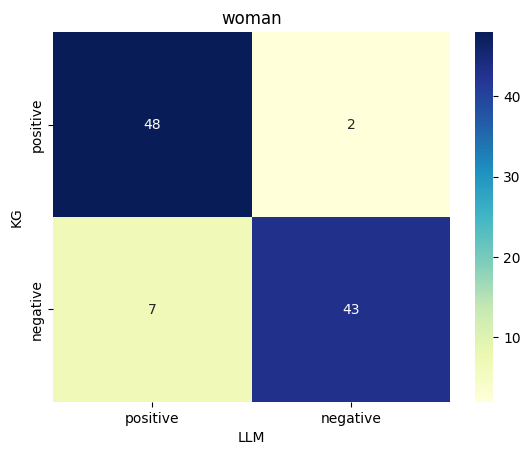

### LLM positive, KG negative

label,description,rationale
Em Weinstein,"Em Weinstein is a television writer and director. Weinstein's 2018 short, ""Candace"", won the Best Film at the American Pavilion at the Cannes Film Festival.","The definition provided for the concept of a woman is an adult female human being. While the description of Em Weinstein does not explicitly state her gender, it refers to her using female pronouns (""her""). This suggests that Em Weinstein is female. Additionally, she is described as an adult, as she is a professional television writer and director, roles that typically require a level of maturity and experience. Therefore, based on the definition provided, we can argue that Em Weinstein is a woman."
Bree Lowdermilk,Bree Lowdermilk (formerly Brian Lowdermilk) is an American musical theater composer and lyricist.,"The description of Bree Lowdermilk states that she was formerly known as Brian Lowdermilk, indicating a change in gender identity. As the definition of a woman is an adult female human being, and Bree Lowdermilk is identified as such, it can be asserted that Bree Lowdermilk is a woman."
Diana King,"Diana King (born 8 November 1970) is a Jamaican-American singer-songwriter who performs a mixture and fusion of reggae, reggae fusion and dancehall. They are best known for their hit 1995 single ""Shy Guy"" and their remake of ""I Say a Little Prayer"" which was featured on the soundtrack to My Best Friend's Wedding. As of 1998, King has sold over five million records worldwide. Regarded as one of the most successful Jamaican artists, they have scored multiple Billboard Hot 100 and Billboard 200 entries. King is also a recipient of the ""Vanguard Award"" at the Out Music Awards.","The definition of a woman is an adult female human being. Diana King is described as a Jamaican-American singer-songwriter, which indicates that she is a human being. The use of female pronouns such as ""she"" and ""her"" in the description suggests that Diana King is female. Therefore, given that Diana King is an adult, as indicated by her career and achievements, it can be argued that Diana King fits the definition of a woman."
Andreas Bruce,"Ferdinand ""Andreas"" Edvard Bruce, born as Christina ""Therese"" Isabelle Jeanette Louise Bruce (1808–1885), was a Swedish memoir writer. His story was the first memoir written by a transsexual person in Sweden and is regarded as unique in many aspects.","Based on the definition provided, a woman is an adult female human being. Andreas Bruce, born as Christina ""Therese"" Isabelle Jeanette Louise Bruce, was biologically female at birth. Therefore, according to the given definition, Andreas Bruce can be considered a woman."
Sidney Flanigan,"Sidney Jeanne Flanigan (born October 19, 1998) is an American actress and singer-songwriter. Flanigan made her acting debut with the acclaimed independent drama film Never Rarely Sometimes Always (2020), for which she received nominations for the Critics' Choice Movie Award for Best Actress and the Independent Spirit Award for Best Female Lead.","The definition of a woman is an adult female human being. Sidney Flanigan is described as an actress and singer-songwriter, which indicates that she is a human being. The description also uses female pronouns (""she"" and ""her"") to refer to Sidney Flanigan, indicating that she is female. Furthermore, her birth date is given as October 19, 1998, which means she is an adult. Therefore, based on the definition, Sidney Flanigan can be classified as a woman."
Janae Kroc,"Janae Marie Kroczaleski (born Matthew Raymond Kroczaleski) is an American who previously competed as a professional powerlifter and competitive bodybuilder. In regard to combined (squat, bench press, and deadlift) equipped powerlifting total, on April 25, 2009, in Iowa, Kroc set the male world record in the 220 lb. weight class with 2,551 lbs (composed of 738 pound bench press, 810 pound deadlift and 1003 pound back squat), which at the time was also the fifth high

### LLM negative, KG positive

label,description,rationale
Elke Mackenzie,"Elke Mackenzie (11 September 1911 – 18 January 1990), born Ivan Mackenzie Lamb, was a British polar explorer and botanist who specialised in the field of lichenology.","The text does not provide sufficient information to assert that Elke Mackenzie is a woman based on the provided definition. The description mentions that Elke Mackenzie was born Ivan Mackenzie Lamb, which suggests a male identity. However, the text does not provide any information about a gender transition or identification as a female, which would be necessary to categorize Elke Mackenzie as a woman according to the given definition. Therefore, based solely on the provided information, an argument cannot be made that Elke Mackenzie is a woman."
Peaches Christ,"Peaches Christ (stage name for Joshua Grannell) is an American underground drag performer, emcee, filmmaker, and actor. Peaches currently resides in San Francisco where her Backlash Production Company and Midnight Mass movie series are based. Grannell studied film at Penn State University, where his senior thesis film Jizzmopper: A Love Story, about a janitor at an adult video store, won the audience award at the annual Penn State Student Film Festival. Grannell developed the Peaches Christ character during the production of this film. Her Midnight Mass road-show and Short Film Retrospective have been on tour and appeared in Seattle, Berkeley, New York City, Brussels, Belgium, and Lausanne, Switzerland.On September 7, 2007, the San Francisco de Young Museum hosted a ""Decade of Peaches Christ Retrospective"" called Cattychism featuring artistic contributions inspired by Peaches. The event included ten years of costume design by long-time collaborator Tria Connell and ten years of graphic design by artist Chris Hatfield.","The assertion that Peaches Christ is a woman cannot be supported based on the provided definition and information. The definition of a woman is an adult female human being. However, the information provided about Peaches Christ indicates that she is a stage character developed by Joshua Grannell, who is presumably male. While Peaches Christ is a drag performer, which typically involves adopting the appearance and mannerisms of a woman, this does not change the biological sex of the performer. Therefore, based on the provided definition and information, Peaches Christ cannot be classified as a woman."


## woman (haslanger_woman)

S is a woman iff (i) S is regularly and for the most part observed or imagined to have certain bodily features presumed to be evidence of a female’s biological role in reproduction; (ii) that S has these features marks S within the dominant ideology of S’s society as someone who ought to occupy certain kinds of social position that are in fact subordinate (and so motivates and justifies S’s occupying such a position); and (iii) the fact that S satisfies (I) and (ii) plays a role in S’s systematic subordination, that is, along some dimension, S’s social position is oppressive, and S’s satisfying (i) and (ii) plays a role in that dimension of subordination

### Confusion matrix

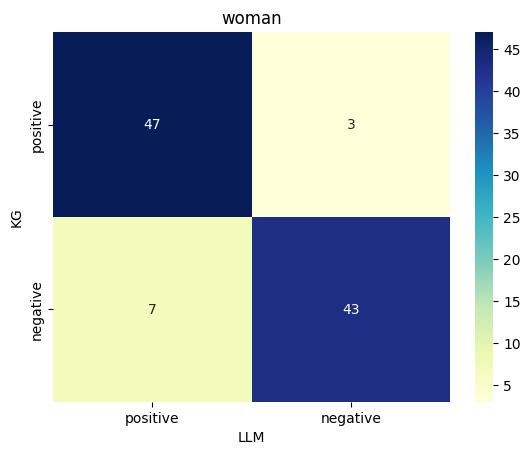

### LLM positive, KG negative

label,description,rationale
Iphis,"In Greek and Roman mythology, Iphis or Iphys ( EYE-fis, IF-iss; Ancient Greek: Ἶφις Îphis [íi.pʰis], gen. Ἴφιδος Ī́phidos) was a child of Telethusa and Ligdus in Crete, born female and raised as male, who was later transformed by the goddess Isis into a man.","Based on the provided definition, Iphis can be considered a woman because she was born female, which satisfies condition (i) as she was observed to have certain bodily features presumed to be evidence of a female’s biological role in reproduction. Even though Iphis was raised as a male, the societal expectations and roles she was expected to fulfill were likely those of a woman, given her biological sex, which satisfies condition (ii). The fact that Iphis was raised as a male could be seen as a form of systematic subordination, as it suggests that being a woman was seen as less desirable or inferior in her society, which satisfies condition (iii). Therefore, according to this definition, Iphis can be considered a woman."
Bree Lowdermilk,Bree Lowdermilk (formerly Brian Lowdermilk) is an American musical theater composer and lyricist.,"Based on the provided definition, Bree Lowdermilk can be considered a woman if she satisfies the three conditions. (i) If Bree Lowdermilk is regularly and for the most part observed or imagined to have certain bodily features presumed to be evidence of a female’s biological role in reproduction, then she satisfies the first condition. The description does not provide specific information about her physical features, but since she has transitioned from Brian to Bree, it can be inferred that she may have undergone physical changes to align with her female identity. (ii) If Bree Lowdermilk, having these features, is marked within the dominant ideology of her society as someone who ought to occupy certain kinds of social position that are in fact subordinate, then she satisfies the second condition. As a transgender woman, she may face societal expectations and prejudices that position her in a subordinate role. (iii) If the fact that Bree Lowdermilk satisfies (i) and (ii) plays a role in her systematic subordination, that is, along some dimension, her social position is oppressive, and her satisfying (i) and (ii) plays a role in that dimension of subordination, then she satisfies the third condition. As a transgender woman, she may face systematic subordination and oppression due to her gender identity. Therefore, based on the provided definition and the inferred information about Bree Lowdermilk, it can be argued that Bree Lowdermilk is a woman."
Henry Tse,"Henry Edward Tse (born 1990/91) is a transgender rights activist based in Hong Kong. He is the founder of Transgender Equality Hong Kong. In February 2023, Tse won a court appeal to remove full sex reassignment surgery as a requirement for changing gender on identification cards.","Given the information provided, it can be argued that Henry Tse is a woman based on the definition provided. (i) It is not explicitly stated, but it can be inferred that Henry Tse, as a transgender rights activist who won a court appeal to remove full sex reassignment surgery as a requirement for changing gender on identification cards, likely identifies as a woman and may have undergone some form of transition to have certain bodily features presumed to be evidence of a female’s biological role in reproduction. (ii) As a transgender woman in Hong Kong, a society where transgender individuals often face discrimination and prejudice, it can be argued that Henry Tse is marked within the dominant ideology of his society as someone who ought to occupy certain kinds of social position that are in fact subordinate. This is evidenced by his activism for transgender rights, which suggests that he is working to challenge and change these subordinate social positions. (iii) The fact that Henry Tse satisfies (i) and (ii) plays a role in his systematic subordination. As a transgender woman,

### LLM negative, KG positive

label,description,rationale
Terri O'Connell,"Terri Leigh O'Connell (born July 7, 1964) is a former motorsports racing champion, artist, author, and fashion model.","The definition of a woman provided here is complex and involves three conditions. However, the description of Terri O'Connell does not provide enough information to definitively assert that she is a woman according to this definition. We do not have information about whether Terri O'Connell is regularly and for the most part observed or imagined to have certain bodily features presumed to be evidence of a female’s biological role in reproduction. We also do not have information about whether these features mark her within the dominant ideology of her society as someone who ought to occupy certain kinds of social position that are in fact subordinate. Finally, we do not have information about whether the fact that she satisfies the first two conditions plays a role in her systematic subordination, that is, whether along some dimension, her social position is oppressive, and whether her satisfying the first two conditions plays a role in that dimension of subordination. Therefore, based solely on the information provided in the description, we cannot assert that Terri O'Connell is a woman according to the provided definition."
Elke Mackenzie,"Elke Mackenzie (11 September 1911 – 18 January 1990), born Ivan Mackenzie Lamb, was a British polar explorer and botanist who specialised in the field of lichenology.","The provided description does not provide enough information to definitively assert that Elke Mackenzie is a woman based on the given definition. The description does not mention whether Elke Mackenzie is regularly and for the most part observed or imagined to have certain bodily features presumed to be evidence of a female’s biological role in reproduction. It also does not provide information on whether Elke Mackenzie is marked within the dominant ideology of her society as someone who ought to occupy certain kinds of social position that are in fact subordinate. Lastly, it does not mention whether Elke Mackenzie's social position is oppressive, and whether her satisfying the first two conditions plays a role in that dimension of subordination. Therefore, based on the given definition and the provided information, we cannot assert that Elke Mackenzie is a woman."
Aya Kamikawa,"Aya Kamikawa (上川 あや, Kamikawa Aya, born January 25, 1968) is a Tokyo municipal official. With her election in April 2003, she became the first openly transgender person to seek or win elected office in Japan.","Given the information provided, it is not possible to definitively assert that Aya Kamikawa is a woman based on the provided definition. The definition requires that a woman is regularly observed or imagined to have certain bodily features presumed to be evidence of a female’s biological role in reproduction. However, the description of Aya Kamikawa does not provide any information about her bodily features or how she is perceived in terms of biological role in reproduction. The definition also requires that a woman is marked within the dominant ideology of her society as someone who ought to occupy certain kinds of social position that are in fact subordinate. While the description of Aya Kamikawa mentions that she is a municipal official, it does not provide any information about how this position is viewed within the dominant ideology of her society, or whether it is considered subordinate. Finally, the definition requires that a woman's social position is oppressive, and that her satisfying the first two conditions plays a role in that dimension of subordination. The description of Aya Kamikawa does not provide any information about whether her social position is oppressive, or whether her bodily features or social position play a role in any subordination she may experience. Therefore, based solely on the provided definition and the information about Aya Kamikawa, it is not po

In [7]:
for experiment in experiment_df["experiment"].values:
    display_experiment(experiment)